In [1]:
import numpy as np
import pandas as pd
import json
import os 
print(os.path.abspath('.'))

/home/gdp/data/DeepPurpose


In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings("ignore")
from DeepPurpose import utils, DTI, dataset, encoders
from DeepPurpose.DTI import *

In [3]:
Smile = np.load("data/DB_smiles.npy", allow_pickle=True)
Target = np.load("data/DB_targets.npy", allow_pickle=True)
y = np.load("data/DB_y.npy", allow_pickle=True)
print('Done!')

Done!


In [4]:
model2 = DTI.model_pretrained(path_dir = './db-cnn-trans-all')
model2

In [5]:
X_drugs, X_targets, y = Smile, Target, y

drug_encoding, target_encoding = 'CNN', 'Transformer'
X = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')

Drug Target Interaction Prediction Mode...
in total: 66434 drug-target pairs
encoding drug...
unique drugs: 10661
encoding protein...
unique target sequence: 1413
splitting dataset...
do not do train/test split on the data for already splitted data


In [6]:
y_pred = model2.predict(X) 
y_label = y
y_pred_ = pd.DataFrame(y_pred, columns=['y_pred'])

predicting...


In [3]:
####################
labels = np.load('labels-dtc.npy', allow_pickle=True)
predict_labels = np.load('labels_predict-dtc.npy', allow_pickle=True)

In [4]:
labels_ = [x.item() for x in labels]
labels2 = np.array(labels_)

In [5]:
df_data = pd.DataFrame(zip(labels2, predict_labels))
df_data.rename(columns={0:'labels', 1:'predict_labels'}, inplace=True)
print('in total: ' + str(len(df_data)) + ' drug-target pairs')

in total: 50642 drug-target pairs


In [6]:
df_data.head()

,labels,predict_labels
0,9,5.185974
1,9,5.185974
2,6,5.185974
3,5,5.185974
4,5,5.185974


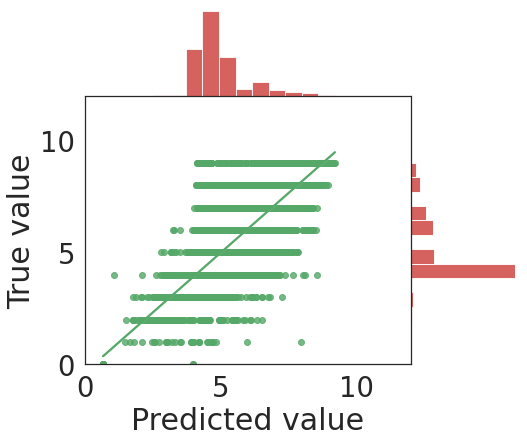

In [9]:
sns.set(style="white",font_scale=2.5)
g = sns.jointplot(x='predict_labels', y='labels', data=df_data, color='g',space=0,xlim=[0,12],ylim=[0,12],
                  marginal_kws=dict(bins=14, kde=False,color='#c72e29'),
                  kind='reg',
                  height=5, ratio=3)
g.set_axis_labels('Predicted value', 'True value')
g.fig.set_size_inches(10,8)#设置图尺寸

In [7]:
g.savefig('y_pred_GNN-CNN-DTC', dpi=600)

In [7]:
df_data = pd.DataFrame(zip(Smile, Target, y))
df_data.rename(columns={0:'SMILES',1: 'Target_Sequence',2: 'Label'}, inplace=True)
print('in total: ' + str(len(df_data)) + ' drug-target pairs')

in total: 66434 drug-target pairs


In [8]:
data = pd.concat([y_pred_, df_data],axis=1)

In [9]:
data.head()

,y_pred,SMILES,Target_Sequence,Label
0,9.288939,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.251812
1,9.192636,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.229148
2,9.049971,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.031517
3,9.217070,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.522879
4,9.537995,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,9.585027


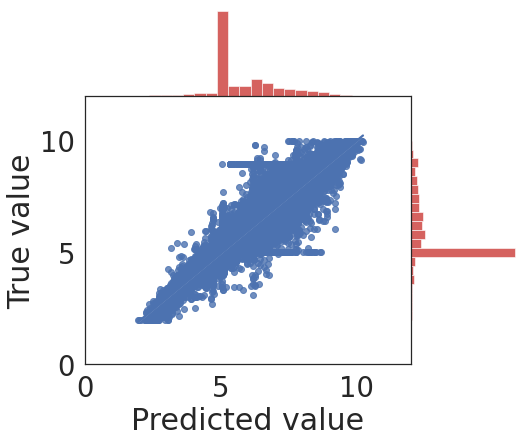

In [11]:
sns.set(style="white",font_scale=2.5)
g = sns.jointplot(x='y_pred', y='Label', data=data, color='b',space=0,xlim=[0,12],ylim=[0,12],
                  marginal_kws=dict(bins=20, kde=False,color='#c72e29'),
                  kind='reg',
                  height=5, ratio=3)
g.set_axis_labels('Predicted value', 'True value')
g.fig.set_size_inches(10,8)#设置图尺寸

In [12]:
g.savefig('y_pred_CNN-TRANS-DB', dpi=600)